<a href="https://colab.research.google.com/github/KhEvgeniy/KhEvgeniy/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22number%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
#from tensorflow.python.keras.optimizers import Adam
#from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image

from PIL import Image

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train =x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

In [ ]:
x_train = x_train.astype('float32')
x_train = x_train / 255

x_test = x_test.astype('float32')
x_test = x_test / 255

In [ ]:
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

Epoch 1/30
120/120 [==============================] - 2s 12ms/step - loss: 0.7011 - accuracy: 0.7918 - val_loss: 0.2754 - val_accuracy: 0.9197
Epoch 2/30
120/120 [==============================] - 2s 13ms/step - loss: 0.2827 - accuracy: 0.9162 - val_loss: 0.2021 - val_accuracy: 0.9392
Epoch 3/30
120/120 [==============================] - 1s 11ms/step - loss: 0.2123 - accuracy: 0.9374 - val_loss: 0.1655 - val_accuracy: 0.9515
Epoch 4/30
120/120 [==============================] - 1s 11ms/step - loss: 0.1722 - accuracy: 0.9501 - val_loss: 0.1484 - val_accuracy: 0.9565
Epoch 5/30
120/120 [==============================] - 2s 13ms/step - loss: 0.1458 - accuracy: 0.9565 - val_loss: 0.1350 - val_accuracy: 0.9601
Epoch 6/30
120/120 [==============================] - 2s 13ms/step - loss: 0.1228 - accuracy: 0.9626 - val_loss: 0.1262 - val_accuracy: 0.9633
Epoch 7/30
120/120 [==============================] - 1s 11ms/step - loss: 0.1064 - accuracy: 0.9680 - val_loss: 0.1189 - val_accuracy: 0.9646

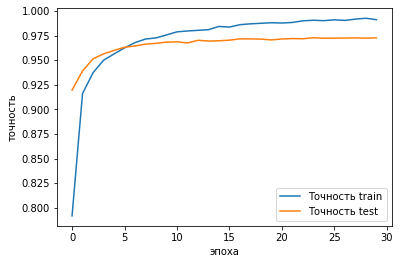

In [ ]:
from sklearn import metrics
from tensorflow.python.keras import optimizer_v1
model = Sequential()
model.add(Dense(128, input_dim = 784, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

n = 30000

history = model.fit(x_train[:n],
                    y_train[:n],
                    batch_size = 250,
                    epochs = 30,
                    validation_data = (x_train[n:], y_train[n:]), verbose = 1)

plt.plot(history.history['accuracy'],
         label = 'Точность train')
plt.plot(history.history['val_accuracy'],
         label = 'Точность test')
plt.xlabel('эпоха')
plt.ylabel('точность')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
